In [1]:
from imports import *

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [4]:
df['label_group'] = df['label_group'].astype('category').cat.codes

In [5]:
df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,666
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",7572
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,6172
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,10509
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,9425


### Same phash for different groups

In [6]:
phash_agg = df.groupby(by=['image_phash'])['label_group'].unique()

In [7]:
phash_agg = phash_agg[(phash_agg.apply(lambda x : len(x)) > 1)]

In [8]:
df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,666
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",7572
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,6172
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,10509
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,9425


In [9]:
phash_agg

image_phash
84b67e8525cf3f02          [4784, 7281]
84b67f8525cf3f00    [4784, 3652, 7281]
84eab151bbd44abc           [3640, 840]
8dc03b2e323bc739          [5369, 2643]
8e07e1fffe80e00c         [8082, 10002]
                           ...        
fcb0701999c74bc3         [2786, 10835]
fd2de2311d1fc2c0          [7631, 6257]
fe7e898456893163            [508, 499]
fefa48fa8283a185          [9127, 2240]
ff58d047d6049ab2         [9487, 10688]
Name: label_group, Length: 147, dtype: object

In [10]:
count = 0
while(len(phash_agg) > 0) :
    count += 1
    print('remaining merges :', len(phash_agg))
    print(count)
    to_change = {}
    for groups in phash_agg.values :
        merge_label = groups[0]
        for label in groups :
            if label not in to_change.keys() :
                to_change[label] = merge_label
    df['label_group'] = df['label_group'].apply(lambda x : to_change.get(x, x))
    phash_agg = df.groupby(by=['image_phash'])['label_group'].unique()
    phash_agg = phash_agg[(phash_agg.apply(lambda x : len(x)) > 1)]

remaining merges : 147
1
remaining merges : 8
2


In [11]:
df['label_group'].nunique()

10866

In [12]:
df.to_csv('data/train_image_cleaned.csv')

### Same title for different groups

In [13]:
df = pd.read_csv('data/train_image_cleaned.csv')

In [17]:
title_agg = df.groupby(by=['title'])['label_group'].unique()
title_agg = title_agg[(title_agg.apply(lambda x : len(x)) > 1)]
title_agg

title
(2KG) SHENAR RAK BUKU 3D 1X5 SUSUN ZAMAN NOW                                                              [3240, 8544]
100Pcs Ikat Karet Rambut Elastis Warna Polos Gaya Korea untuk Wanita                                      [2606, 5220]
ALAT CUKUR RAMBUT / KUMIS / JENGGOT NOVA NS-216                                                          [10991, 6445]
ASAH ASAHAN PISAU SURMENE STAINLESS SERBAGUNA knife grinder sharpener                                     [9506, 7166]
BEST SELLER !! SURFINCLO | BISA COD | BOKSER | BOXSER | BOXER PANTAI | RADER | BOXER MURAH | SALE         [2928, 3295]
                                                                                                             ...      
VIVA AIR MAWAR 100ML                                                                                     [9834, 10355]
Viva Air Mawar 100 ml                                                                                    [9834, 10355]
Viva Lulur Mandi Whitening & Moisturizing 

In [18]:
count = 0
while(len(title_agg) > 0) :
    count += 1
    print('remaining merges :', len(title_agg))
    print(count)
    to_change = {}
    for groups in title_agg.values :
        merge_label = groups[0]
        for label in groups :
            if label not in to_change.keys() :
                to_change[label] = merge_label
    df['label_group'] = df['label_group'].apply(lambda x : to_change.get(x, x))
    title_agg = df.groupby(by=['title'])['label_group'].unique()
    title_agg = title_agg[(title_agg.apply(lambda x : len(x)) > 1)]

remaining merges : 62
1
remaining merges : 8
2
remaining merges : 2
3
remaining merges : 1
4


In [19]:
df['label_group'].nunique()

10802

In [20]:
df.to_csv('data/train_image_text_cleaned.csv')

### CChanges

In [21]:
df = pd.read_csv('data/train.csv')
df_cleaned = pd.read_csv('data/train_image_text_cleaned.csv')

<AxesSubplot:>

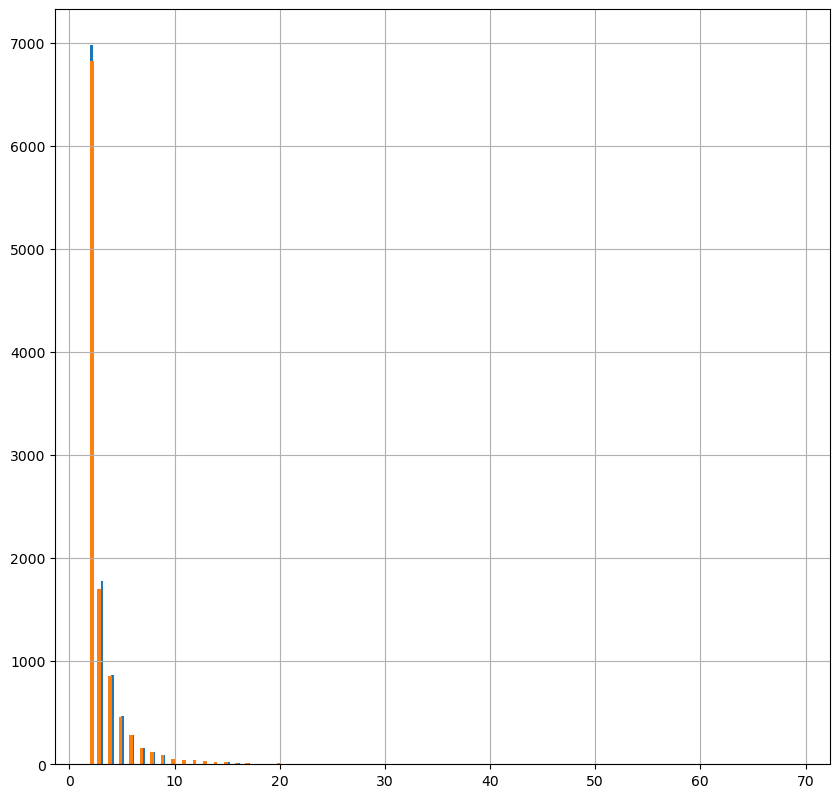

In [27]:
plt.figure(figsize=(10, 10), dpi=100)
df.groupby('label_group').count()['posting_id'].hist(bins=200)
df_cleaned.groupby('label_group').count()['posting_id'].hist(bins=200)